In [319]:
import pandas as pd

In [320]:
pip install 'pokebase==1.3.0'

In [321]:
import pokebase as pb

# Extração de dados.

In [322]:
# Extrair o total de pokemons
num_pokemons = pb.APIResourceList("pokemon")
num_pokemons.count

1302

In [323]:
region_num = pb.APIResourceList("region")

In [324]:
for region in region_num:
  print(region)

{'name': 'kanto', 'url': 'https://pokeapi.co/api/v2/region/1/'}
{'name': 'johto', 'url': 'https://pokeapi.co/api/v2/region/2/'}
{'name': 'hoenn', 'url': 'https://pokeapi.co/api/v2/region/3/'}
{'name': 'sinnoh', 'url': 'https://pokeapi.co/api/v2/region/4/'}
{'name': 'unova', 'url': 'https://pokeapi.co/api/v2/region/5/'}
{'name': 'kalos', 'url': 'https://pokeapi.co/api/v2/region/6/'}
{'name': 'alola', 'url': 'https://pokeapi.co/api/v2/region/7/'}
{'name': 'galar', 'url': 'https://pokeapi.co/api/v2/region/8/'}
{'name': 'hisui', 'url': 'https://pokeapi.co/api/v2/region/9/'}
{'name': 'paldea', 'url': 'https://pokeapi.co/api/v2/region/10/'}


In [325]:
# Definindo todas as regiões existentes.
_regioes = {
    (1, 151): ("Kanto", 1),
    (152, 251): ("Johto", 2),
    (252, 386): ("Hoenn", 3),
    (387, 493): ("Sinnoh", 4),
    (494, 649): ("Unova", 5),
    (650, 721): ("Kalos", 6),
    (722, 809): ("Alola", 7),
    (810, 898): ("Galar", 8),
    (899, 1302): ("Paldea", 9)
}
# "Hisui" foi retirado por não ser considerado da franquia original de jogos.

In [326]:
# Testando os valores que vão ser extraidos
charmander = pb.pokemon('charmander')
print(charmander.name)
print(charmander.types[0].type)
print(charmander.height)

for status in charmander.stats:
  # Mostrar os status base do pokemon.
  print(f"{status.stat.name}: {status.base_stat}")

charmander
fire
6
hp: 39
attack: 52
defense: 43
special-attack: 60
special-defense: 50
speed: 65


In [327]:
charmander.abilities[0]

# Formatação dos dados.

In [328]:
import tqdm
# Criação de uma barra dinamica.
import os

In [329]:
pokemon_data = []


# Extrair a quantiadade de pokemons das primeiras quatro gerações.
for i in tqdm.tqdm(range(1, 493)):
    pokemon = pb.pokemon(i)  # Obtém o Pokémon pelo ID


    # Coletando informações para analise.
    name = pokemon.name
    height = pokemon.height
    types = str(pokemon.types[0].type)
    hp = next(stat.base_stat for stat in pokemon.stats if stat.stat.name == 'hp')
    attack = next(stat.base_stat for stat in pokemon.stats if stat.stat.name == 'attack')
    defense = next(stat.base_stat for stat in pokemon.stats if stat.stat.name == 'defense')
    sp = next(stat.base_stat for stat in pokemon.stats if stat.stat.name == 'speed')

    # Determinar a região e a geração com base no ID do Pokémon
    region, generation = None, None
    for id_range, (reg, gen) in _regioes.items():
        if id_range[0] <= i <= id_range[1]:
            region = reg
            generation = gen
            break


    pokemon_data.append({
        'ID': i,
        'Name': name,
        'Type': types,
        'Height': height,
        'HP': hp,
        "Speed": sp,
        'Attack': attack,
        'Defense': defense,
        'Region': region,
        'Generation': generation
    })


df = pd.DataFrame(pokemon_data)

100%|██████████| 492/492 [04:12<00:00,  1.95it/s]


In [330]:
df.head()

,ID,Name,Type,Height,HP,Speed,Attack,Defense,Region,Generation
0,1,bulbasaur,grass,7,45,45,49,49,Kanto,1
1,2,ivysaur,grass,10,60,60,62,63,Kanto,1
2,3,venusaur,grass,20,80,80,82,83,Kanto,1
3,4,charmander,fire,6,39,65,52,43,Kanto,1
4,5,charmeleon,fire,11,58,80,64,58,Kanto,1


In [331]:
pd.unique(df.Type.values)

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel'], dtype=object)

# Visualização de graficos

In [332]:
import plotly.express as px
import plotly.graph_objects as go

In [333]:
bar_visualization = px.bar(df.Type, x="Type", color='Type', barmode='stack')
bar_visualization

## Attack

In [334]:
graph = px.box(df, x='Attack', y='Type',points='all', title="Attack Pokemons - Median", color="Type")

graph

In [335]:
fig = px.histogram(df, x='Attack', color='Type')
fig.show()

## Defense

In [336]:
graph = px.box(df, x='Defense', y='Type',points='all', title="Defense Pokemons - Median", color="Type")

graph

## HP

In [337]:
graph = px.box(df, x='HP', y='Type',points='all', title="HP Pokemons Type - Median", color="Type")

graph

## SPEED

In [338]:
graph = px.box(df, x='Speed', y='Type',points='all', title="Speed Pokemons Type - Median", color="Type")

graph

## Correlation Attack X Defense X HP X Speed

In [339]:
graph = px.scatter_matrix(df, dimensions=["Attack","Defense", "HP", "Speed"], color="Type")

graph.show()

In [340]:
# Pegar uma região em especifico para ver o desempenho.
def specific_region(type_you_want):
    filtered_dfs = []

    for typ in type_you_want:
        filtered_df = df[df['Region'].apply(lambda types: typ in types)]
        filtered_dfs.append(filtered_df)

    result_df = pd.concat(filtered_dfs)
    return result_df

In [341]:
Kanto = specific_region(['Kanto'])

In [342]:
fig = px.scatter(Kanto, y="Attack", trendline="ols", facet_col_wrap=17, color='Type')


# Ajusta o espaçamento entre os subplots
fig.update_xaxes(matches=None)
fig.update_yaxes(matches=None)

fig.show()

## By Region

In [373]:
bar_visualization = px.bar(df, x="Region", color='Region', barmode='stack', title="Number of pokemon by region")

bar_visualization

In [374]:
df_exploded = df.explode('Type')
type_counts = df_exploded.groupby(['Region', 'Type']).size().reset_index(name='Count')

# Criar o gráfico de barras slide.
fig = px.bar(type_counts, x='Type', y='Count', color='Type',
             animation_frame='Region', animation_group='Type',
             range_y=[0, type_counts['Count'].max()],
             title="Amount type of pokemon by region")

fig.show()

# Data modeling

In [375]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

import torch.nn.functional as F
import torch
import torch.nn as nn

In [376]:
pip install torchviz

In [377]:
# Visualizar a rede neural
from torchviz import make_dot


In [378]:
np.random.seed(123)
torch.manual_seed(123)
# Definir uma seed faz com que todos os pesos venham dentro de um padrão. Isso torna o resultado replicavel.

In [379]:
def specific_types(type_you_want):
    filtered_dfs = []

    for typ in type_you_want:
        filtered_df = df[df['Type'].apply(lambda types: typ in types)]
        filtered_dfs.append(filtered_df)

    result_df = pd.concat(filtered_dfs)
    return result_df

In [380]:
New_base = specific_types(["fire", "water", "grass"])

In [381]:
New_base.head()

,ID,Name,Type,Height,HP,Speed,Attack,Defense,Region,Generation
3,4,charmander,fire,6,39,65,52,43,Kanto,1
4,5,charmeleon,fire,11,58,80,64,58,Kanto,1
5,6,charizard,fire,17,78,100,84,78,Kanto,1
36,37,vulpix,fire,6,38,65,41,40,Kanto,1
37,38,ninetales,fire,11,73,100,76,75,Kanto,1


In [382]:
type_class = list(New_base['Type'].values)
pokemon_data_base = New_base.drop(columns=['ID', 'Name', 'Type', 'Region'])

In [383]:
encoder = LabelEncoder()
type_class = encoder.fit_transform(type_class)

In [384]:
np.unique(type_class)

array([0, 1, 2])

In [385]:
test_predictors, training_predictors, test_class, training_class= train_test_split(pokemon_data_base, type_class, test_size=0.25)
# Separar os tipos dde pokemons e suas configurações para o treinamento na rede neural.

In [386]:
training_predictors = np.array(training_predictors.values, dtype= np.float32)

In [387]:
training_predictors = torch.tensor(training_predictors, dtype = torch.float)
training_class = torch.tensor(training_class, dtype=torch.long)

## Model

In [388]:
classificador = nn.Sequential(
    nn.Linear(6, 5, bias=True),
    nn.ReLU(),
    nn.Linear(5, 5, bias=True),
    nn.ReLU(),
    nn.Linear(5, 3, bias=True),
    )


In [389]:
criterion = nn.CrossEntropyLoss()
Optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

In [390]:
print(training_predictors.size())
print(training_class.size())

torch.Size([40, 6])
torch.Size([40])


In [391]:
dataset = torch.utils.data.TensorDataset(training_predictors, training_class)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

## Train Model

In [392]:
for epoca in tqdm.tqdm(range(200)):
  running_loss = 0.
  running_accuracy = 0

  for data in train_loader:
    inputs, labels = data

    Optimizer.zero_grad()

    outputs = classificador.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()

    outputs = F.softmax(outputs)
    top_p, top_class = outputs.topk(k=1, dim= 1)

    equals = top_class == labels.view(*top_class.shape)

    running_accuracy += torch.mean(equals.type(torch.float))
    Optimizer.step()
    running_loss += loss.item()

  0%|          | 0/200 [00:00<?, ?it/s]<ipython-input-392-e50a2e7113c9>:14: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

100%|██████████| 200/200 [00:01<00:00, 115.02it/s]


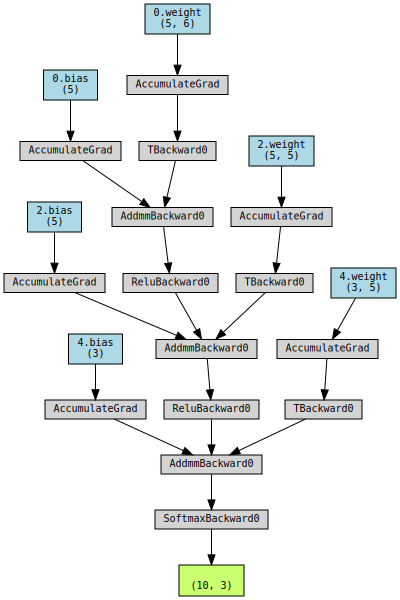

In [393]:
# Visualizar a rede neural.
dot = make_dot(outputs, params=dict(classificador.named_parameters()))
dot.render("classificador", format="png")
dot

## Model Evaluation

In [394]:
classificador.eval()

Sequential(
  (0): Linear(in_features=6, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=3, bias=True)
)

In [395]:
test_predictors = np.array(test_predictors.values, dtype= np.float32)
test_predictors = torch.tensor(test_predictors, dtype=torch.float)

In [396]:
predictor = classificador(test_predictors)

In [397]:
F.softmax(predictor)

<ipython-input-397-3d1308a69034>:1: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



tensor([[2.8661e-01, 3.5418e-01, 3.5921e-01],
        [1.1958e-01, 2.6971e-01, 6.1072e-01],
        [2.9262e-01, 3.5399e-01, 3.5340e-01],
        [4.4415e-02, 1.7029e-01, 7.8530e-01],
        [3.3724e-01, 3.5521e-01, 3.0755e-01],
        [1.9334e-01, 3.2253e-01, 4.8413e-01],
        [3.0293e-01, 3.5490e-01, 3.4217e-01],
        [1.0442e-01, 2.5538e-01, 6.4019e-01],
        [7.9253e-02, 2.2450e-01, 6.9624e-01],
        [2.9183e-01, 3.5404e-01, 3.5414e-01],
        [3.0341e-01, 3.5482e-01, 3.4177e-01],
        [1.6146e-01, 3.0759e-01, 5.3096e-01],
        [3.5392e-01, 3.5452e-01, 2.9156e-01],
        [1.0758e-02, 8.1009e-02, 9.0823e-01],
        [2.5910e-01, 3.5095e-01, 3.8995e-01],
        [1.9399e-01, 3.2498e-01, 4.8103e-01],
        [1.5944e-01, 3.0236e-01, 5.3821e-01],
        [2.4911e-01, 3.4919e-01, 4.0170e-01],
        [9.0323e-02, 2.4531e-01, 6.6437e-01],
        [3.4591e-01, 3.5593e-01, 2.9817e-01],
        [2.6709e-01, 3.5157e-01, 3.8134e-01],
        [2.5786e-01, 3.5103e-01, 3

In [398]:
predictor =[np.argmax(t) for t in predictor.detach().numpy()]

In [399]:
matriz = confusion_matrix(predictor, test_class)

In [400]:
Hit_Rate = accuracy_score(test_class, predictor)
Hit_Rate

0.44166666666666665

In [404]:
fig = px.imshow(matriz,
                text_auto=True,
                color_continuous_scale="inferno")

fig

# Arquivo de requerimentos.

In [402]:
pip freeze > requirements.txt
